Попробовать улучшить точность распознования образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложить анализ с описанием того, что улучшает работу нейронной сети и что ухудшает.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [2]:
tf.config.threading.set_inter_op_parallelism_threads(0)

In [3]:
tf.random.set_seed(42)

In [4]:
batch_size = 2048
num_classes = 10
epochs = 10

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
print(f'Количество обучающих примеров: {X_train.shape[0]}\n\
Количество тестовых примеров: {X_test.shape[0]}\n\
Количество обучающих меток классов {y_train.shape[0]}\n\
Количество тестовых меток классов {y_test.shape[0]}')

Количество обучающих примеров: 50000
Количество тестовых примеров: 10000
Количество обучающих меток классов 50000
Количество тестовых меток классов 10000


In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [11]:
X_train = X_train.astype('float32') / 256
X_test = X_test.astype('float32') / 256

In [12]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

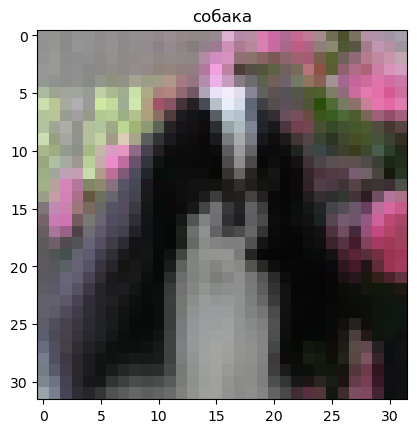

In [13]:
N = 42

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [14]:
def generate_model():
    return Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]),
        Activation('relu'),
        Conv2D(32, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), padding='same'),
        Activation('relu'),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512),
        Activation('relu'),
        Dropout(0.5),
        Dense(10),
        Activation('softmax')
      ])

model = generate_model()

In [15]:
def compile_model(model):
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

model = compile_model(model)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [17]:
model.fit(X_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(X_test, y_test),
         shuffle=True)

Epoch 1/10
25/25 [==============================] - 125s 5s/step - loss: 2.2215 - accuracy: 0.1667 - val_loss: 2.1077 - val_accuracy: 0.2569
Epoch 2/10
25/25 [==============================] - 123s 5s/step - loss: 2.0698 - accuracy: 0.2372 - val_loss: 2.0036 - val_accuracy: 0.2846
Epoch 3/10
25/25 [==============================] - 121s 5s/step - loss: 1.9820 - accuracy: 0.2780 - val_loss: 1.9367 - val_accuracy: 0.3142
Epoch 4/10
25/25 [==============================] - 116s 5s/step - loss: 1.9158 - accuracy: 0.3074 - val_loss: 1.8947 - val_accuracy: 0.3331
Epoch 5/10
25/25 [==============================] - 103s 4s/step - loss: 1.8634 - accuracy: 0.3304 - val_loss: 1.8014 - val_accuracy: 0.3724
Epoch 6/10
25/25 [==============================] - 77s 3s/step - loss: 1.8275 - accuracy: 0.3431 - val_loss: 1.7653 - val_accuracy: 0.3850
Epoch 7/10
25/25 [==============================] - 81s 3s/step - loss: 1.7870 - accuracy: 0.3575 - val_loss: 1.7417 - val_accuracy: 0.3868
Epoch 8/10
25/2

In [18]:
train_acc, test_acc = model.evaluate(X_train, y_train)[1], model.evaluate(X_test, y_test)[1]

313/313 [==============================] - 8s 26ms/step - loss: 1.6534 - accuracy: 0.4174


In [19]:
train_acc, test_acc

(0.4158399999141693, 0.4174000024795532)

In [20]:
result_dict = {'variant': [], 'train_acc': [], 'test_acc': []}

In [21]:
result_dict['variant'].append('Базовый случай')
result_dict['train_acc'].append(f'{train_acc:.4f}')
result_dict['test_acc'].append(f'{test_acc:.4f}')

In [22]:
result_dict

{'variant': ['Базовый случай'],
 'train_acc': ['0.4158'],
 'test_acc': ['0.4174']}

### Вариант "Больше фильтров"

In [23]:
model2 = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]),
        Activation('relu'),
        Conv2D(32, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), padding='same'),
        Activation('relu'),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
    
        Conv2D(128, (3, 3), padding='same'),
        Activation('relu'),
        Conv2D(128, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512),
        Activation('relu'),
        Dropout(0.5),
        Dense(10),
        Activation('softmax')
      ])

In [24]:
model2 = compile_model(model2)

In [25]:
model2.fit(X_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(X_test, y_test),
         shuffle=True)

Epoch 1/10
25/25 [==============================] - 148s 6s/step - loss: 2.2812 - accuracy: 0.1174 - val_loss: 2.2261 - val_accuracy: 0.1528
Epoch 2/10
25/25 [==============================] - 121s 5s/step - loss: 2.1668 - accuracy: 0.1882 - val_loss: 2.0798 - val_accuracy: 0.2452
Epoch 3/10
25/25 [==============================] - 94s 4s/step - loss: 2.0841 - accuracy: 0.2189 - val_loss: 2.0502 - val_accuracy: 0.2468
Epoch 4/10
25/25 [==============================] - 97s 4s/step - loss: 2.0506 - accuracy: 0.2314 - val_loss: 1.9904 - val_accuracy: 0.2737
Epoch 5/10
25/25 [==============================] - 95s 4s/step - loss: 2.0035 - accuracy: 0.2545 - val_loss: 1.9656 - val_accuracy: 0.2802
Epoch 6/10
25/25 [==============================] - 92s 4s/step - loss: 1.9610 - accuracy: 0.2733 - val_loss: 1.9444 - val_accuracy: 0.2828
Epoch 7/10
25/25 [==============================] - 90s 4s/step - loss: 1.9308 - accuracy: 0.2841 - val_loss: 1.8767 - val_accuracy: 0.3237
Epoch 8/10
25/25 [

In [26]:
def update_result_dict(model, name):
    train_acc, test_acc = model.evaluate(X_train, y_train)[1], model.evaluate(X_test, y_test)[1]
    result_dict['variant'].append(name)
    result_dict['train_acc'].append(f'{train_acc:.4f}')
    result_dict['test_acc'].append(f'{test_acc:.4f}')    

In [27]:
update_result_dict(model2, 'Больше фильтров')

313/313 [==============================] - 7s 22ms/step - loss: 1.8388 - accuracy: 0.3364


### Вариант "больше полносвязных скрытых слоев"

In [28]:
model3 = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]),
        Activation('relu'),
        Conv2D(32, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), padding='same'),
        Activation('relu'),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512),
        Activation('relu'),
        Dropout(0.25),
        Dense(256),
        Activation('relu'),
        Dropout(0.25),
        Dense(128),
        Activation('relu'),
        Dropout(0.25),
        Dense(64),
        Activation('relu'),
        Dropout(0.25),
        Dense(10),
        Activation('softmax')
      ])

In [29]:
model3 = compile_model(model3)

In [30]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [31]:
model3.fit(X_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           validation_data=(X_test, y_test),
           verbose=0,
           shuffle=True)

In [32]:
update_result_dict(model3, 'Больше полносвязных слоёв')

313/313 [==============================] - 7s 21ms/step - loss: 1.8254 - accuracy: 0.3579


In [33]:
result_dict

{'variant': ['Базовый случай', 'Больше фильтров', 'Больше полносвязных слоёв'],
 'train_acc': ['0.4158', '0.3345', '0.3450'],
 'test_acc': ['0.4174', '0.3364', '0.3579']}

### Еще вариант "больше свертков", но не так много как в варианте №2

In [34]:
model4 = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]),
        Activation('relu'),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), padding='same'),
        Activation('relu'),
        Conv2D(256, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512),
        Activation('relu'),
        Dropout(0.5),
        Dense(10),
        Activation('softmax')
      ])

model4 = compile_model(model4)

model4.fit(X_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           validation_data=(X_test, y_test),
           verbose=0,
           shuffle=True)

update_result_dict(model4, 'Чуть больше полносвязных слоёв')

313/313 [==============================] - 20s 64ms/step - loss: 1.5446 - accuracy: 0.4572


In [36]:
result_df = pd.DataFrame(result_dict)

In [38]:
result_df.sort_values('test_acc', ascending=False)

,variant,train_acc,test_acc
3,Чуть больше полносвязных слоёв,0.4579,0.4572
0,Базовый случай,0.4158,0.4174
2,Больше полносвязных слоёв,0.3450,0.3579
1,Больше фильтров,0.3345,0.3364


In [48]:
def pic_predict(model, number):
    N = number
    y_p = model.predict(X_test[N:N+1])
    y_t = np.argmax(y_test[N:N+1], axis = 1 )
    y_i = np.argmax(y_p, axis = 1 )
    plt.imshow(X_test[N])
    plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
    plt.show()

1/1 [==============================] - 0s 55ms/step


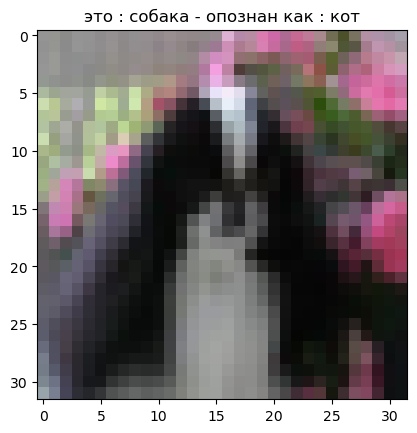

1/1 [==============================] - 0s 56ms/step


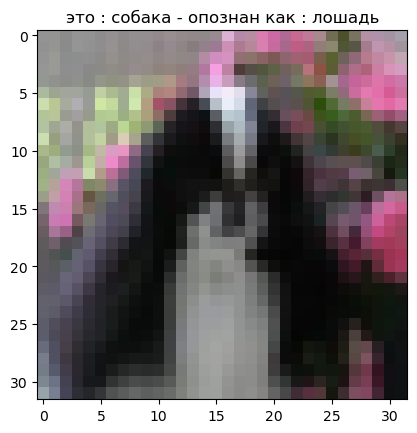

1/1 [==============================] - 0s 62ms/step


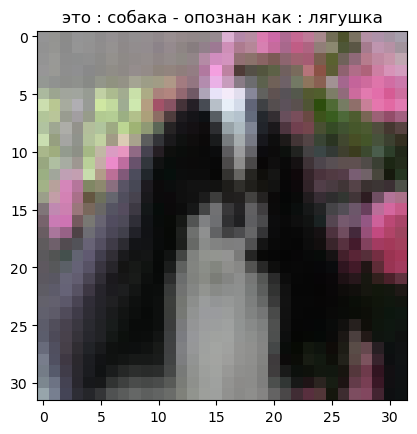

1/1 [==============================] - 0s 68ms/step


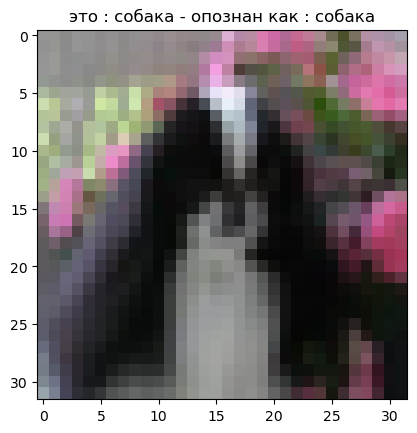

In [49]:
for model in [model, model2, model3, model4]:
    pic_predict(model, 42)

Вывод можно сделать такой - увеличение количества свертков немного улучшает метрику accuracy, но не следует увлекаться - при пересечении порога от изначальной картинки ничего не останется при свертывании и accuracy станет падать в увеличением глубины сети. С полносвязными слоями примерно такая же логика. 

Ради интереса попробую обучить с ImageDataGenerator самый удачный вариант

In [50]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=0, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0., 
    zoom_range=0., 
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0)

In [51]:
model4.fit_generator(datagen.flow(X_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(X_test, y_test)
                        )

C:\Users\edive\AppData\Local\Temp\ipykernel_5420\4047353300.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model4.fit_generator(datagen.flow(X_train, y_train,


Epoch 1/10
25/25 [==============================] - 322s 13s/step - loss: 1.6630 - accuracy: 0.4044 - val_loss: 1.5440 - val_accuracy: 0.4549
Epoch 2/10
25/25 [==============================] - 341s 14s/step - loss: 1.6410 - accuracy: 0.4116 - val_loss: 1.5211 - val_accuracy: 0.4578
Epoch 3/10
25/25 [==============================] - 339s 14s/step - loss: 1.6222 - accuracy: 0.4178 - val_loss: 1.5424 - val_accuracy: 0.4525
Epoch 4/10
25/25 [==============================] - 338s 14s/step - loss: 1.6087 - accuracy: 0.4252 - val_loss: 1.4590 - val_accuracy: 0.4911
Epoch 5/10
25/25 [==============================] - 304s 12s/step - loss: 1.5880 - accuracy: 0.4281 - val_loss: 1.4457 - val_accuracy: 0.4857
Epoch 6/10
25/25 [==============================] - 296s 12s/step - loss: 1.5789 - accuracy: 0.4349 - val_loss: 1.4237 - val_accuracy: 0.4969
Epoch 7/10
25/25 [==============================] - 302s 12s/step - loss: 1.5605 - accuracy: 0.4412 - val_loss: 1.4057 - val_accuracy: 0.4953
Epoch 

In [52]:
update_result_dict(model4, 'data augmentation')

313/313 [==============================] - 19s 60ms/step - loss: 1.3689 - accuracy: 0.5121


1/1 [==============================] - 0s 33ms/step


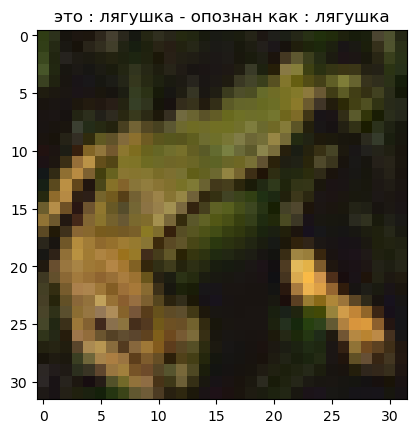

In [58]:
pic_predict(model4, 41)

In [59]:
result_df = pd.DataFrame(result_dict)

In [60]:
result_df.sort_values('test_acc', ascending=False)

,variant,train_acc,test_acc
4,data augmentation,0.5186,0.5121
3,Чуть больше полносвязных слоёв,0.4579,0.4572
0,Базовый случай,0.4158,0.4174
2,Больше полносвязных слоёв,0.3450,0.3579
1,Больше фильтров,0.3345,0.3364


### Описать также в анализе какие необоходимо внести изменения в получившуюся у вас нейронную сеть если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.

Ну как минимум input_shape поменять для mnist и imagenet. Плюс у CIFAR100 сто классов, у Imagenet вообще 21841 категория и 220000 классов, насколько я понял. Значит нужно сильно больше эпох, не помешает аугментация данных, дропауты, перекрестное обучение или предобучение 